In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
# Import the datset into python
df = pd.read_excel(r"C:\Users\ia\Desktop\Travail\Oloye Olarenwaju\2\AN INVESTIGATION INTO THE IMPACT OF ONLINE BRANDING ON THE PERFORMANCE OF DANGOTE CEMENT PLC, NIGERIA.xlsx")

In [3]:
# View the first five variables
df.head()

,Age,Gender,Education,CurrentPosition,OnlineBrandingPlatform,SocialMediaBranding,SearchEngineAdvertising,CompanyWebsite,EmailMarketing,OnlinePressRelease,OnlineBrandingEffort,OnlineBranding,OverallImpact,SalesGrowth,BrandAwareness,CustomerEngagement,MarketPenetration,ROI,SignificantChallenges,MainChallenges
0,26-35,Female,Master’s Degree,Entry Level,"SocialMedia, CompanyWebsite",Effective,Effective,Effective,Neutral,o Neutral,Agree,Neutral,High,Very High,High,Moderate,High,Moderate,Yes,LackOfExpertise
1,26-35,Female,Master’s Degree,Senior Management,EmailMarketing,Neutral,Effective,Effective,Effective,Effective,Agree,Agree,High,Moderate,Moderate,Moderate,Moderate,Moderate,Yes,InadequateOnlinePresence
2,26-35,Female,Bachelor’s Degree,Mid-Level Management,"SocialMedia, CompanyWebsite, InfluencerPartner...",Very Effective,Effective,Very Effective,Effective,Effective,Agree,Strongly agree,High,Very High,High,High,Very High,High,No,"BudgetConstraints, InadequateOnlinePresence"
3,36-45,Male,Master’s Degree,Mid-Level Management,SocialMedia,Very Effective,Effective,Effective,Effective,Very Effective,Strongly agree,Strongly agree,Very High,High,High,High,High,High,No,BudgetConstraints
4,26-35,Female,Master’s Degree,Mid-Level Management,CompanyWebsite,Effective,Neutral,Effective,Very Effective,Very Effective,Agree,Agree,Moderate,Very High,Very High,Very High,High,High,Yes,BudgetConstraints


In [4]:
# To show the total number of rows and columns
df.shape

(100, 20)

In [5]:
# To show the number of each coloumn
df.columns

Index(['Age', 'Gender', 'Education', 'CurrentPosition',
       'OnlineBrandingPlatform', 'SocialMediaBranding',
       'SearchEngineAdvertising', 'CompanyWebsite', 'EmailMarketing',
       'OnlinePressRelease', 'OnlineBrandingEffort', 'OnlineBranding',
       'OverallImpact', 'SalesGrowth', 'BrandAwareness', 'CustomerEngagement',
       'MarketPenetration', 'ROI', 'SignificantChallenges', 'MainChallenges'],
      dtype='object')

In [6]:
# This attribute shows the data types of each column
df.dtypes

Age                        object
Gender                     object
Education                  object
CurrentPosition            object
OnlineBrandingPlatform     object
SocialMediaBranding        object
SearchEngineAdvertising    object
CompanyWebsite             object
EmailMarketing             object
OnlinePressRelease         object
OnlineBrandingEffort       object
OnlineBranding             object
OverallImpact              object
SalesGrowth                object
BrandAwareness             object
CustomerEngagement         object
MarketPenetration          object
ROI                        object
SignificantChallenges      object
MainChallenges             object
dtype: object

In [7]:
# This attribute shows the data types of each column
df.dtypes

Age                        object
Gender                     object
Education                  object
CurrentPosition            object
OnlineBrandingPlatform     object
SocialMediaBranding        object
SearchEngineAdvertising    object
CompanyWebsite             object
EmailMarketing             object
OnlinePressRelease         object
OnlineBrandingEffort       object
OnlineBranding             object
OverallImpact              object
SalesGrowth                object
BrandAwareness             object
CustomerEngagement         object
MarketPenetration          object
ROI                        object
SignificantChallenges      object
MainChallenges             object
dtype: object

In [8]:
# It will show the total no of unque value from whole data frame
df.nunique()

Age                         4
Gender                      3
Education                   5
CurrentPosition             4
OnlineBrandingPlatform     24
SocialMediaBranding         3
SearchEngineAdvertising     4
CompanyWebsite              4
EmailMarketing              5
OnlinePressRelease          3
OnlineBrandingEffort        4
OnlineBranding              5
OverallImpact               4
SalesGrowth                 3
BrandAwareness              3
CustomerEngagement          3
MarketPenetration           4
ROI                         4
SignificantChallenges       2
MainChallenges             15
dtype: int64

In [9]:
# To Show Data type of each colum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      100 non-null    object
 1   Gender                   100 non-null    object
 2   Education                100 non-null    object
 3   CurrentPosition          100 non-null    object
 4   OnlineBrandingPlatform   100 non-null    object
 5   SocialMediaBranding      100 non-null    object
 6   SearchEngineAdvertising  100 non-null    object
 7   CompanyWebsite           100 non-null    object
 8   EmailMarketing           100 non-null    object
 9   OnlinePressRelease       100 non-null    object
 10  OnlineBrandingEffort     100 non-null    object
 11  OnlineBranding           100 non-null    object
 12  OverallImpact            100 non-null    object
 13  SalesGrowth              100 non-null    object
 14  BrandAwareness           100 non-null    ob

In [10]:
print(pd.concat([df["Age"].value_counts(), df["Age"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

       Count  Percentage
Age                     
26-35     66        0.66
36-45     22        0.22
18-25      7        0.07
46-55      5        0.05


In [11]:
# Convert Age to numeric using mapping
Age_map = {'18-25': 1, '26-35': 2, "36-45": 3, "46-55": 4}
df['Age'] = df['Age'].map(Age_map)

# Descriptive statistics
print(df['Age'].describe())

count    100.000000
mean       2.250000
std        0.657129
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Age, dtype: float64


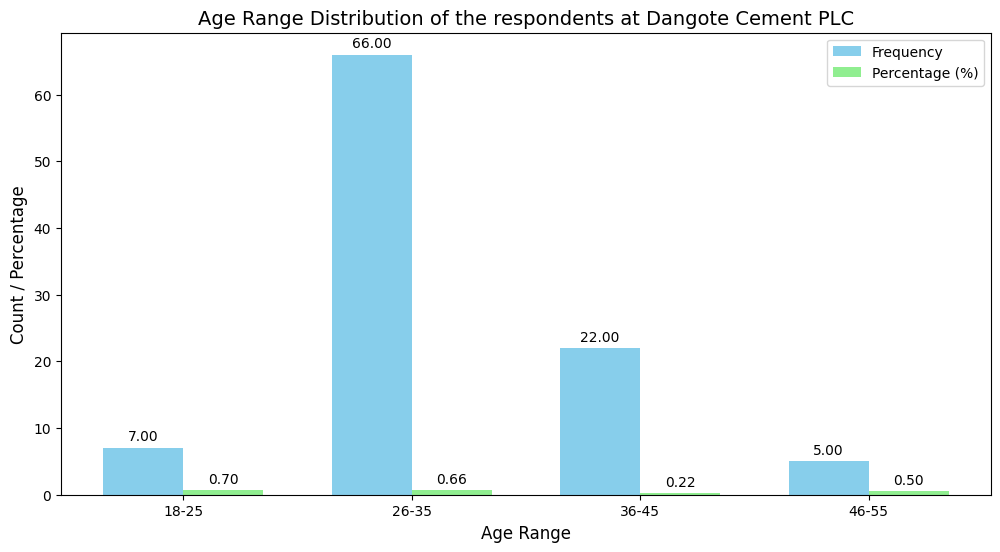

In [12]:
# Data from the table
age_ranges = ['18-25', '26-35', '36-45', '46-55']
frequencies = [7, 66, 22, 5]
percentages = [0.7, 0.66, 0.22, 0.5]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar graph
x = np.arange(len(age_ranges))
width = 0.35

rects1 = ax.bar(x - width/2, frequencies, width, label='Frequency', color='skyblue')
rects2 = ax.bar(x + width/2, percentages, width, label='Percentage (%)', color='lightgreen')

# Customize the graph
ax.set_xlabel('Age Range', fontsize=12)
ax.set_ylabel('Count / Percentage', fontsize=12)
ax.set_title('Age Range Distribution of the respondents at Dangote Cement PLC', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(age_ranges)
ax.legend()

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

In [13]:
print(pd.concat([df["Gender"].value_counts(), df["Gender"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

                   Count  Percentage
Gender                              
Female                68        0.68
Male                  30        0.30
Prefer not to say      2        0.02


In [14]:
# Convert Age to numeric using mapping
Gender_map = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(Gender_map)

# Descriptive statistics
print(df['Gender'].describe())

count    98.000000
mean      0.693878
std       0.463251
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Gender, dtype: float64


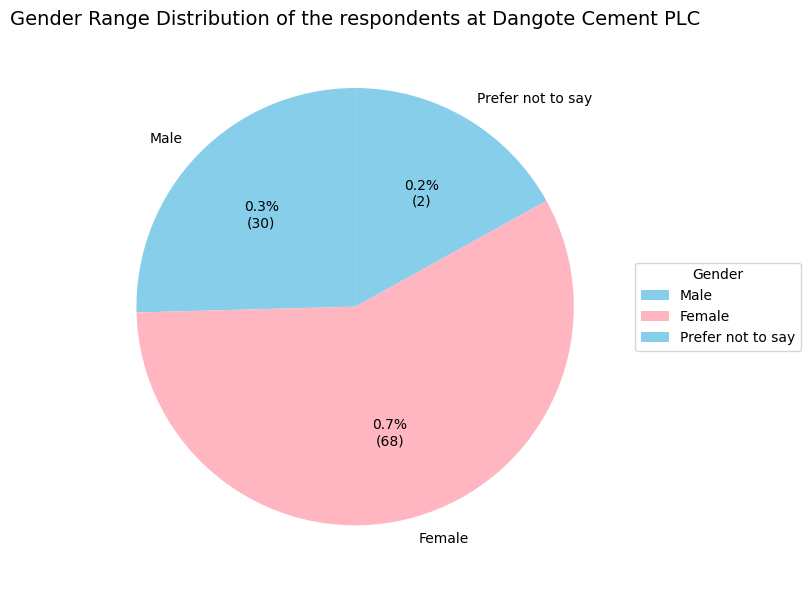

In [15]:
# Data from the table
genders = ['Male', 'Female', 'Prefer not to say']
frequencies = [30, 68, 2]
percentages = [0.30, 0.68, 0.2]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the pie chart
wedges, texts, autotexts = ax.pie(percentages, labels=genders, autopct='%1.1f%%',
                                  startangle=90, colors=['skyblue', 'lightpink'])

# Add frequency information to the labels
for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{percentages[i]:.1f}%\n({frequencies[i]})')

# Customize the chart
ax.set_title('Gender Range Distribution of the respondents at Dangote Cement PLC', fontsize=14)

# Add a legend
ax.legend(wedges, genders,
          title="Gender",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout and display the graph
plt.tight_layout()
plt.show()

In [16]:
print(pd.concat([df["Education"].value_counts(), df["Education"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

                   Count  Percentage
Education                           
Master’s Degree       63        0.63
Bachelor’s Degree     26        0.26
Diploma                8        0.08
Secondary School       2        0.02
Doctorate              1        0.01


In [17]:
# Convert Education to numeric using mapping
Education_map = {'Secondary School': 1, 'Diploma': 2, 'Bachelor’s Degree': 3, 'Master’s Degree': 4, 'Doctorate': 5}
df['Education'] = df['Education'].map(Education_map)

# Descriptive statistics
print(df['Education'].describe())

count    100.000000
mean       3.530000
std        0.744746
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Education, dtype: float64


In [18]:
print(pd.concat([df["CurrentPosition"].value_counts(), df["CurrentPosition"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

                      Count  Percentage
CurrentPosition                        
Mid-Level Management     41        0.41
Entry Level              39        0.39
Senior Management        16        0.16
Executive                 4        0.04


In [19]:
# Convert CurrentPosition to numeric using mapping
CurrentPosition_map = {'Entry Level': 1, 'Mid-Level Management': 2, 'Senior Management': 3, 'Executive': 4}
df['ECurrentPosition'] = df['CurrentPosition'].map(CurrentPosition_map)

# Descriptive statistics
print(df['CurrentPosition'].describe())

count                      100
unique                       4
top       Mid-Level Management
freq                        41
Name: CurrentPosition, dtype: object


In [20]:
pybool1 = df['OnlineBrandingPlatform'].str.contains('SocialMedia')
pybool1.value_counts()
pybool1.value_counts(normalize=True)


OnlineBrandingPlatform
True     0.6
False    0.4
Name: proportion, dtype: float64

In [21]:
pybool1 = df['OnlineBrandingPlatform'].str.split(',', expand=True)
pybool1.head()


,0,1,2,3,4,5
0,SocialMedia,CompanyWebsite,None,None,None,None
1,EmailMarketing,None,None,None,None,None
2,SocialMedia,CompanyWebsite,InfluencerPartnerships,None,None,None
3,SocialMedia,None,None,None,None,None
4,CompanyWebsite,None,None,None,None,None


In [22]:
pybool1.stack().value_counts()

SocialMedia                60
 CompanyWebsite            34
 SearchEngineAds           30
CompanyWebsite             24
 InfluencerPartnerships    20
 EmailMarketing            20
 OnlinePressReleases       17
                            7
SearchEngineAds             6
EmailMarketing              5
InfluencerPartnerships      3
Branding                    2
Name: count, dtype: int64

In [23]:
pybool1.stack().value_counts(normalize=True)


SocialMedia                0.263158
 CompanyWebsite            0.149123
 SearchEngineAds           0.131579
CompanyWebsite             0.105263
 InfluencerPartnerships    0.087719
 EmailMarketing            0.087719
 OnlinePressReleases       0.074561
                           0.030702
SearchEngineAds            0.026316
EmailMarketing             0.021930
InfluencerPartnerships     0.013158
Branding                   0.008772
Name: proportion, dtype: float64

In [24]:
print(pybool1.stack().value_counts().describe())

count    12.000000
mean     19.000000
std      16.819902
min       2.000000
25%       5.750000
50%      18.500000
75%      25.500000
max      60.000000
Name: count, dtype: float64


<Axes: >

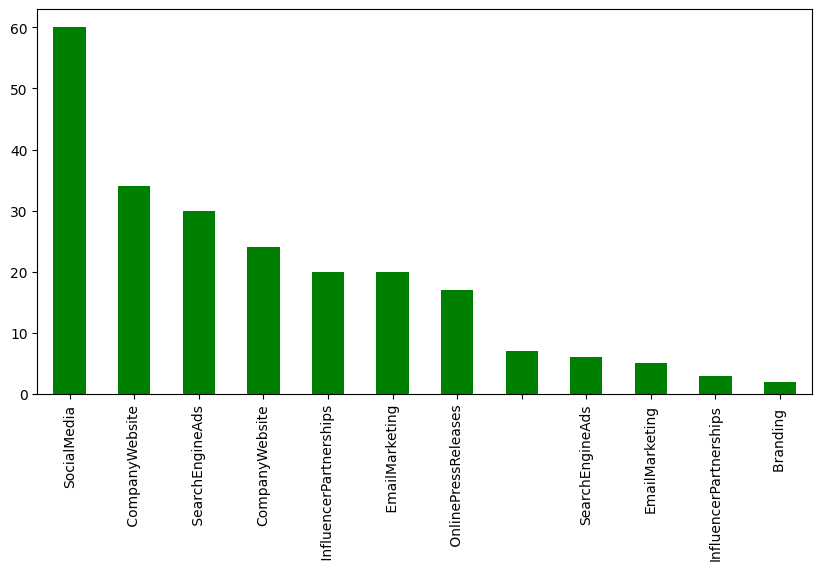

In [25]:
pybool1.stack().value_counts().plot(kind='bar', figsize= (10, 5), color ='green')

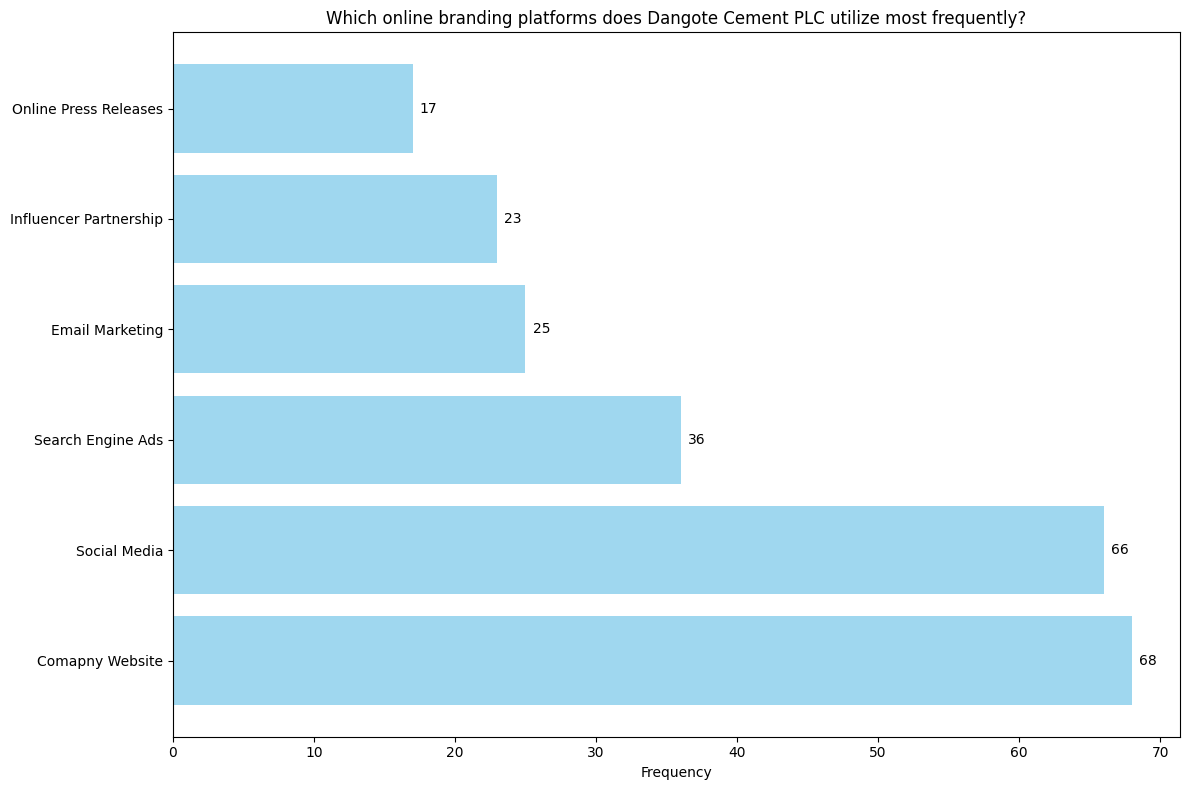

In [26]:
# Data from the table
Online_Branding_Platform = ['Social Media', 'Search Engine Ads', 'Comapny Website', 'Email Marketing', 'Online Press Releases', 'Influencer Partnership']
frequencies = [66, 36, 68, 25, 17, 23, 2]

# Sort the data in descending order
Online_Branding_Platform, frequencies = zip(*sorted(zip(Online_Branding_Platform, frequencies), key=lambda x: x[1], reverse=True))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create the horizontal bar chart
ax.barh(Online_Branding_Platform, frequencies, color='skyblue', alpha=0.8)

# Customize the chart
ax.set_xlabel('Frequency')
ax.set_title('Which online branding platforms does Dangote Cement PLC utilize most frequently?')

# Add value labels on the bars
for i, v in enumerate(frequencies):
    ax.text(v + 0.5, i, str(v), va='center')

# Adjust layout and display the graph
plt.tight_layout()
plt.show()

In [27]:
print(pd.concat([df["SocialMediaBranding"].value_counts(), df["SocialMediaBranding"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

                     Count  Percentage
SocialMediaBranding                   
Very Effective          47        0.47
Effective               41        0.41
Neutral                 12        0.12


In [28]:
# Convert SocialMediaBranding to numeric using mapping
SocialMediaBranding_map = {'Very Effective': 1, 'Effective': 2, 'Neutral': 3}
df['SocialMediaBranding'] = df['SocialMediaBranding'].map(SocialMediaBranding_map)

# Descriptive statistics
print(df['SocialMediaBranding'].describe())

count    100.000000
mean       1.650000
std        0.687184
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: SocialMediaBranding, dtype: float64


In [29]:
print(pd.concat([df["SearchEngineAdvertising"].value_counts(), df["SearchEngineAdvertising"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

                         Count  Percentage
SearchEngineAdvertising                   
Effective                   45        0.45
Very Effective              36        0.36
Neutral                     17        0.17
Ineffective                  2        0.02


In [30]:
# Convert SearchEngineAdvertising to numeric using mapping
SearchEngineAdvertising_map =  {'Very Effective': 1, 'Effective': 2, 'Neutral': 3, 'ineffective': 4, 'Very Ineffective': 5}
df['SearchEngineAdvertising'] = df['SearchEngineAdvertising'].map(SearchEngineAdvertising_map)

# Descriptive statistics
print(df['SearchEngineAdvertising'].describe())

count    98.000000
mean      1.806122
std       0.713033
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: SearchEngineAdvertising, dtype: float64


In [31]:
print(pd.concat([df["CompanyWebsite"].value_counts(), df["CompanyWebsite"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

                Count  Percentage
CompanyWebsite                   
Effective          57        0.57
Very Effective     32        0.32
Neutral             9        0.09
Ineffective         2        0.02


In [32]:
# Convert CompanyWebsite to numeric using mapping
CompanyWebsite_map =  {'Very Effective': 1, 'Effective': 2, 'Neutral': 3, 'ineffective': 4, 'Very Ineffective': 5}
df['CompanyWebsite'] = df['CompanyWebsite'].map(CompanyWebsite_map)

# Descriptive statistics
print(df['CompanyWebsite'].describe())

count    98.000000
mean      1.765306
std       0.605831
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: CompanyWebsite, dtype: float64


In [33]:
print(pd.concat([df["EmailMarketing"].value_counts(), df["EmailMarketing"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

                  Count  Percentage
EmailMarketing                     
Effective            60        0.60
Very Effective       22        0.22
Neutral              14        0.14
Ineffective           2        0.02
Very Ineffective      2        0.02


In [34]:
# Convert EmailMarketing to numeric using mapping
EmailMarketing_map =  {'Very Effective': 1, 'Effective': 2, 'Neutral': 3, 'ineffective': 4, 'Very Ineffective': 5}
df['EmailMarketing'] = df['EmailMarketing'].map(EmailMarketing_map)

# Descriptive statistics
print(df['EmailMarketing'].describe())

count    98.000000
mean      1.979592
std       0.745842
min       1.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       5.000000
Name: EmailMarketing, dtype: float64


In [35]:
print(pd.concat([df["OnlinePressRelease"].value_counts(), df["OnlinePressRelease"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

                    Count  Percentage
OnlinePressRelease                   
Effective              50        0.50
Very Effective         29        0.29
o Neutral              21        0.21


In [36]:
# Convert OnlinePressRelease to numeric using mapping
OnlinePressRelease_map =  {'Very Effective': 1, 'Effective': 2, 'o Neutral': 3, 'ineffective': 4, 'Very Ineffective': 5}
df['OnlinePressRelease'] = df['OnlinePressRelease'].map(OnlinePressRelease_map)

# Descriptive statistics
print(df['OnlinePressRelease'].describe())

count    100.000000
mean       1.920000
std        0.706106
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: OnlinePressRelease, dtype: float64


In [37]:
print(pd.concat([df["OnlineBrandingEffort"].value_counts(), df["OnlineBrandingEffort"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

                      Count  Percentage
OnlineBrandingEffort                   
Agree                    42        0.42
Neutral                  27        0.27
Strongly agree           25        0.25
Strongly disagree         6        0.06


In [38]:
# Convert OnlineBrandingEfforte to numeric using mapping
OnlineBrandingEffort_map =  {'Very Effective': 1, 'Effective': 2, 'Neutral': 3, 'ineffective': 4, 'Very Ineffective': 5}
df['OnlineBrandingEffort'] = df['OnlineBrandingEffort'].map(OnlineBrandingEffort_map)

# Descriptive statistics
print(df['OnlineBrandingEffort'].describe())

count    27.0
mean      3.0
std       0.0
min       3.0
25%       3.0
50%       3.0
75%       3.0
max       3.0
Name: OnlineBrandingEffort, dtype: float64


In [39]:
print(pd.concat([df["OnlineBranding"].value_counts(), df["OnlineBranding"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

                   Count  Percentage
OnlineBranding                      
Agree                 51        0.51
Neutral               19        0.19
Strongly agree        17        0.17
Disagree               8        0.08
Strongly disagree      5        0.05


In [40]:
# Convert OnlineBranding to numeric using mapping
OnlineBranding_map =  {'Strongly disagree': 1, 'Disagree': 2, 'Neutral': 3, 'Agree': 4, 'Strongly agree': 5}
df['OnlineBranding'] = df['OnlineBranding'].map(OnlineBranding_map)

# Descriptive statistics
print(df['OnlineBranding'].describe())

count    100.000000
mean       3.670000
std        1.015586
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: OnlineBranding, dtype: float64


In [41]:
print(pd.concat([df["OverallImpact"].value_counts(), df["OverallImpact"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

               Count  Percentage
OverallImpact                   
High              43        0.43
Moderate          29        0.29
Very High         26        0.26
Low                2        0.02


In [42]:
# Convert OverallImpact to numeric using mapping
OverallImpact_map =  {'Very High': 1, 'High': 2, 'Moderate': 3, 'Low': 4, 'Very Low': 5}
df['OverallImpact'] = df['OverallImpact'].map(OverallImpact_map)

# Descriptive statistics
print(df['OverallImpact'].describe())

count    100.000000
mean       2.070000
std        0.794616
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: OverallImpact, dtype: float64


In [43]:
print(pd.concat([df["SalesGrowth"].value_counts(), df["SalesGrowth"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

             Count  Percentage
SalesGrowth                   
Very High       41        0.41
High            39        0.39
Moderate        20        0.20


In [44]:
# Convert SalesGrowth to numeric using mapping
SalesGrowth_map =  {'Very High': 1, 'High': 2, 'Moderate': 3, 'Low': 4, 'Very Low': 5}
df['SalesGrowth'] = df['SalesGrowth'].map(SalesGrowth_map)

# Descriptive statistics
print(df['SalesGrowth'].describe())

count    100.000000
mean       1.790000
std        0.756053
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: SalesGrowth, dtype: float64


In [45]:
print(pd.concat([df["BrandAwareness"].value_counts(), df["BrandAwareness"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

                Count  Percentage
BrandAwareness                   
High               46        0.46
Very High          33        0.33
Moderate           21        0.21


In [46]:
# Convert BrandAwareness to numeric using mapping
BrandAwareness_map =  {'Very High': 1, 'High': 2, 'Moderate': 3, 'Low': 4, 'Very Low': 5}
df['BrandAwareness'] = df['BrandAwareness'].map(BrandAwareness_map)

# Descriptive statistics
print(df['BrandAwareness'].describe())

count    100.000000
mean       1.880000
std        0.728635
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: BrandAwareness, dtype: float64


In [47]:
print(pd.concat([df["CustomerEngagement"].value_counts(), df["CustomerEngagement"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

                    Count  Percentage
CustomerEngagement                   
High                   43        0.43
Moderate               32        0.32
Very High              25        0.25


In [48]:
# Convert CustomerEngagement to numeric using mapping
CustomerEngagement_map =  {'Very High': 1, 'High': 2, 'Moderate': 3, 'Low': 4, 'Very Low': 5}
df['CustomerEngagement'] = df['CustomerEngagement'].map(CustomerEngagement_map)

# Descriptive statistics
print(df['CustomerEngagement'].describe())

count    100.000000
mean       2.070000
std        0.755518
min        1.000000
25%        1.750000
50%        2.000000
75%        3.000000
max        3.000000
Name: CustomerEngagement, dtype: float64


In [49]:
print(pd.concat([df["MarketPenetration"].value_counts(), df["MarketPenetration"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

                   Count  Percentage
MarketPenetration                   
High                  40        0.40
Very High             37        0.37
Moderate              21        0.21
Low                    2        0.02


In [50]:
# Convert MarketPenetration to numeric using mapping
MarketPenetration_map =  {'Very High': 1, 'High': 2, 'Moderate': 3, 'Low': 4, 'Very Low': 5}
df['MarketPenetration'] = df['MarketPenetration'].map(MarketPenetration_map)

# Descriptive statistics
print(df['MarketPenetration'].describe())

count    100.00000
mean       1.88000
std        0.80754
min        1.00000
25%        1.00000
50%        2.00000
75%        2.00000
max        4.00000
Name: MarketPenetration, dtype: float64


In [51]:
print(pd.concat([df["ROI"].value_counts(), df["ROI"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

           Count  Percentage
ROI                         
Moderate      33        0.33
Very High     33        0.33
High          29        0.29
Low            5        0.05


In [52]:
# Convert ROI to numeric using mapping
ROI_map =  {'Very High': 1, 'High': 2, 'Moderate': 3, 'Low': 4, 'Very Low': 5}
df['ROI'] = df['ROI'].map(ROI_map)

# Descriptive statistics
print(df['ROI'].describe())

count    100.000000
mean       2.100000
std        0.926599
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: ROI, dtype: float64


In [53]:
print(pd.concat([df["SignificantChallenges"].value_counts(), df["SignificantChallenges"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

                       Count  Percentage
SignificantChallenges                   
Yes                       68        0.68
No                        32        0.32


In [54]:
print(pd.concat([df["SignificantChallenges"].value_counts(), df["SignificantChallenges"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

                       Count  Percentage
SignificantChallenges                   
Yes                       68        0.68
No                        32        0.32


In [55]:
# Convert SignificantChallenge to numeric using mapping
SignificantChallenges_map =  {'Yes': 1, 'No': 2}
df['SignificantChallenges'] = df['SignificantChallenges'].map(SignificantChallenges_map)

# Descriptive statistics
print(df['SignificantChallenges'].describe())

count    100.000000
mean       1.320000
std        0.468826
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: SignificantChallenges, dtype: float64


In [56]:
pybool2 = df['MainChallenges'].str.contains('Other')
pybool2.value_counts()
pybool2.value_counts(normalize=True)

MainChallenges
False    0.704082
True     0.295918
Name: proportion, dtype: float64

In [57]:
pybool2 = df['MainChallenges'].str.contains('Other')
pybool2.value_counts()
pybool2.value_counts(normalize=True)

MainChallenges
False    0.704082
True     0.295918
Name: proportion, dtype: float64

In [58]:
pybool2 = df['MainChallenges'].str.split(',', expand=True)
pybool2.head()

,0,1,2,3,4
0,LackOfExpertise,None,None,None,None
1,InadequateOnlinePresence,None,None,None,None
2,BudgetConstraints,InadequateOnlinePresence,None,None,None
3,BudgetConstraints,None,None,None,None
4,BudgetConstraints,None,None,None,None


In [59]:
pybool2.stack().value_counts()

BudgetConstraints            29
Other                        29
InadequateOnlinePresence     21
 DifficultyMeasuringROI      18
 PoorContentQuality          13
 InadequateOnlinePresence    11
LackOfExpertise               7
DifficultyMeasuringROI        6
PoorContentQuality            6
 LackOfExpertise              4
Name: count, dtype: int64

In [60]:
pybool2.stack().value_counts(normalize=True)

BudgetConstraints            0.201389
Other                        0.201389
InadequateOnlinePresence     0.145833
 DifficultyMeasuringROI      0.125000
 PoorContentQuality          0.090278
 InadequateOnlinePresence    0.076389
LackOfExpertise              0.048611
DifficultyMeasuringROI       0.041667
PoorContentQuality           0.041667
 LackOfExpertise             0.027778
Name: proportion, dtype: float64

In [61]:
pybool2.stack().value_counts().describe()

count    10.000000
mean     14.400000
std       9.430447
min       4.000000
25%       6.250000
50%      12.000000
75%      20.250000
max      29.000000
Name: count, dtype: float64

<Axes: >

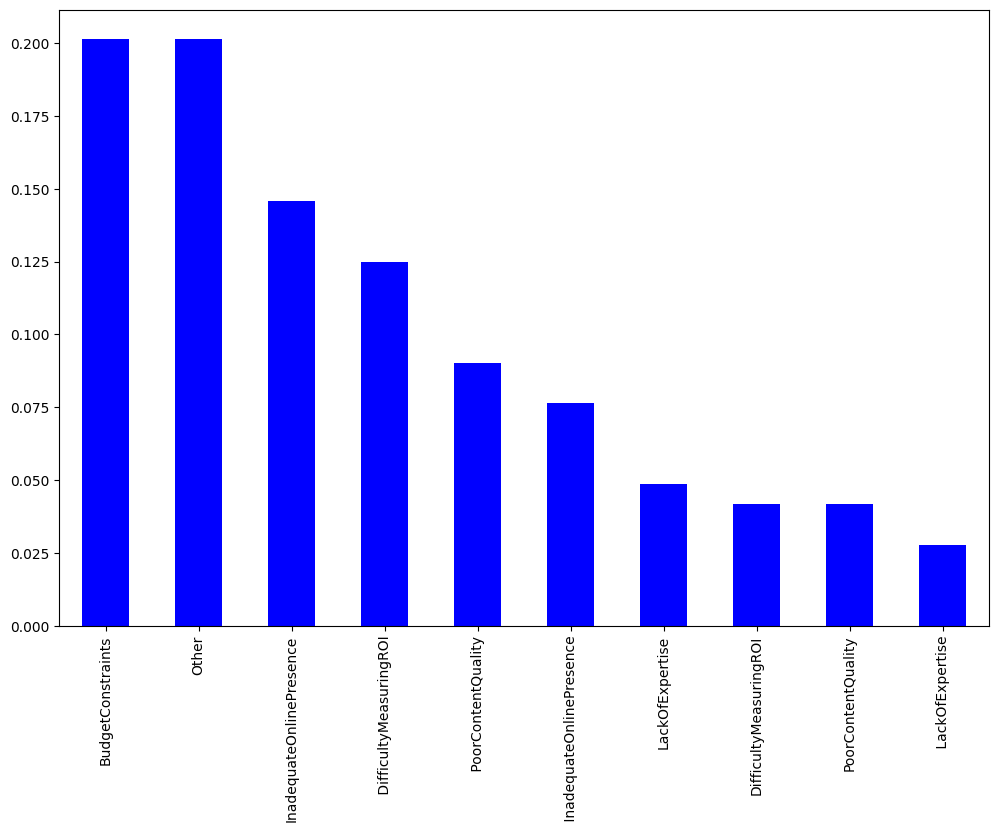

In [62]:
pybool2.stack().value_counts(normalize=True).plot(kind='bar', figsize= (12, 8), color ='blue')

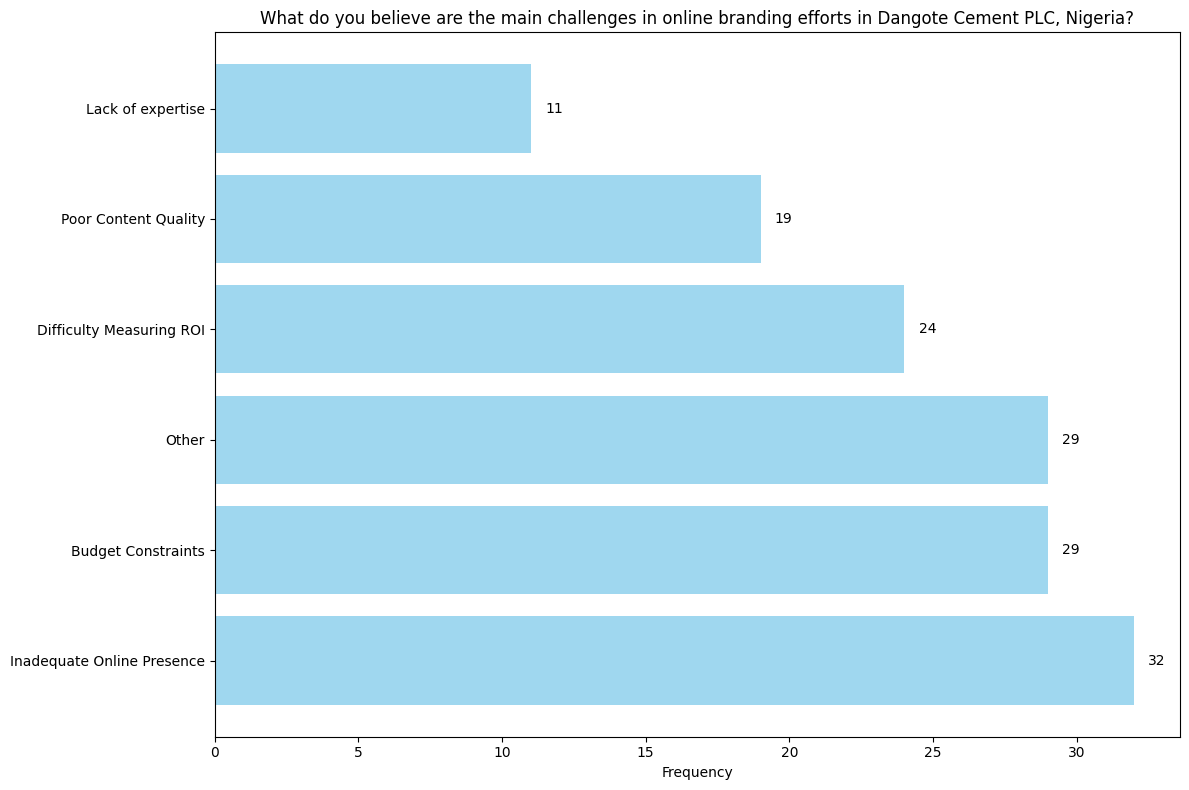

In [63]:
# Data from the table
Main_Challenges = ['Budget Constraints', 'Lack of expertise', 'Inadequate Online Presence', 'Poor Content Quality', 'Difficulty Measuring ROI', 'Other']
frequencies = [29, 11, 32, 19, 24, 29]

# Sort the data in descending order
Main_Challenges, frequencies = zip(*sorted(zip(Main_Challenges, frequencies), key=lambda x: x[1], reverse=True))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create the horizontal bar chart
ax.barh(Main_Challenges, frequencies, color='skyblue', alpha=0.8)

# Customize the chart
ax.set_xlabel('Frequency')
ax.set_title('What do you believe are the main challenges in online branding efforts in Dangote Cement PLC, Nigeria?')

# Add value labels on the bars
for i, v in enumerate(frequencies):
    ax.text(v + 0.5, i, str(v), va='center')

# Adjust layout and display the graph
plt.tight_layout()
plt.show()

"Online branding has no significant impact on company performance aspects such as Sales Growth, Brand Awareness, Customer Engagement, Market Penetration, and Return on Investment (ROI)."

In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [65]:
# Convert categorical variables to numeric
le = LabelEncoder()
columns_to_encode = ['SalesGrowth', 'BrandAwareness', 'CustomerEngagement', 'MarketPenetration', 'ROI']
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

In [66]:

# Prepare the data
X = df[['SalesGrowth', 'BrandAwareness', 'CustomerEngagement', 'MarketPenetration']]
y = df['ROI']

In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [69]:
# Make predictions
y_pred = model.predict(X_test)

In [70]:
# Calculate R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [71]:
# Print the results
print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print("\nCoefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

R-squared: 0.5991
RMSE: 0.5400

Coefficients:
SalesGrowth: -0.0342
BrandAwareness: 0.1697
CustomerEngagement: 0.6544
MarketPenetration: 0.2866


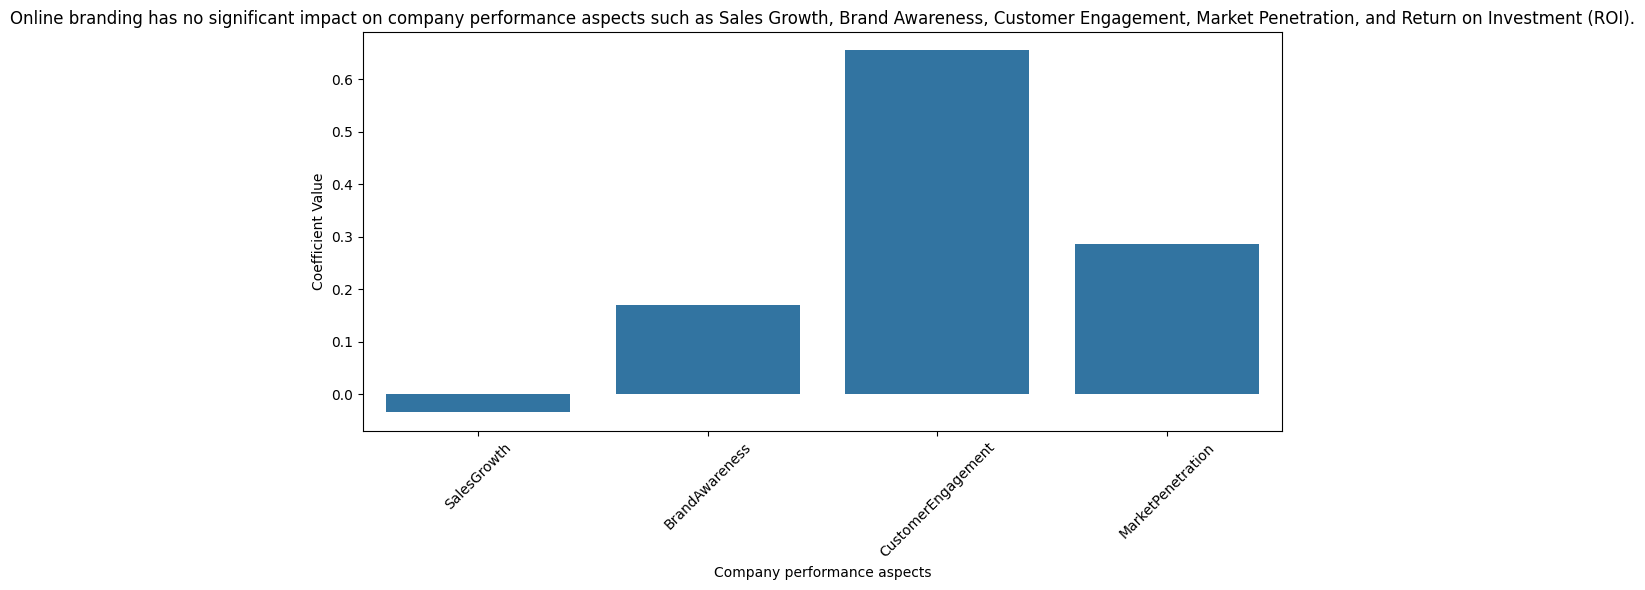

In [72]:
# Create a graph to visualize the importance of each factor
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=model.coef_)
plt.title("Online branding has no significant impact on company performance aspects such as Sales Growth, Brand Awareness, Customer Engagement, Market Penetration, and Return on Investment (ROI).")
plt.xlabel("Company performance aspects")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

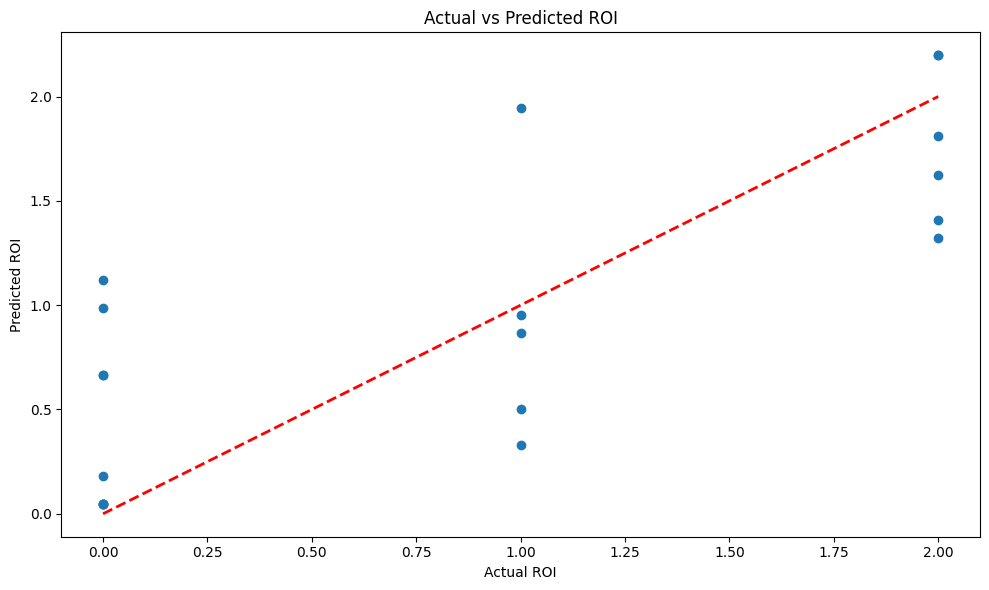

In [73]:

# Create a scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual ROI")
plt.ylabel("Predicted ROI")
plt.title("Actual vs Predicted ROI")
plt.tight_layout()
plt.show()

In [74]:
import statsmodels.api as sm

In [75]:
# Add a constant term to the features (required for statsmodels OLS)
X = sm.add_constant(X)

In [76]:
# Fit the model
model = sm.OLS(y, X).fit()

In [77]:
# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROI   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     38.72
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           3.41e-19
Time:                        14:05:28   Log-Likelihood:                -85.411
No. Observations:                 100   AIC:                             180.8
Df Residuals:                      95   BIC:                             193.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0343      0

In [78]:
# You can also save the summary to a text file
with open('regression_summary.txt', 'w') as f:
    f.write(model.summary().as_text())

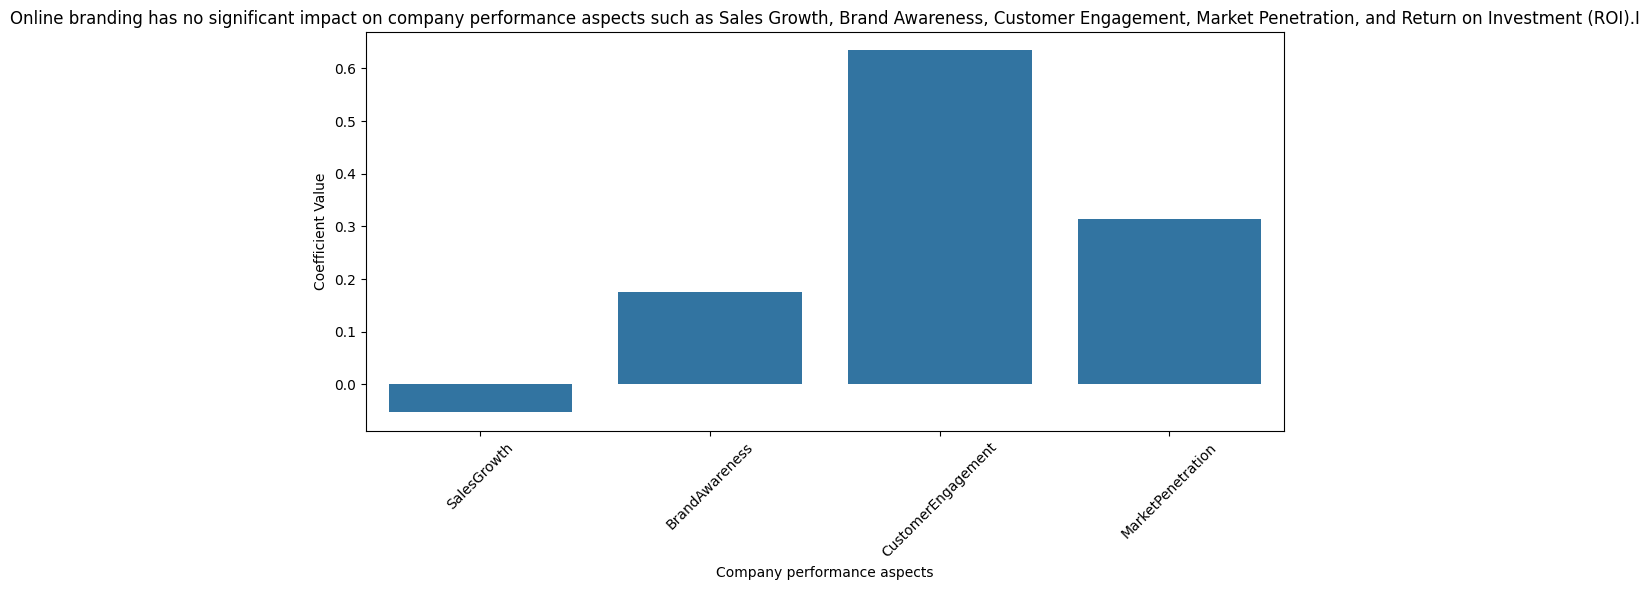

In [79]:
# Create a graph to visualize the importance of each factor
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns[1:], y=model.params[1:])  # Exclude the constant term
plt.title("Online branding has no significant impact on company performance aspects such as Sales Growth, Brand Awareness, Customer Engagement, Market Penetration, and Return on Investment (ROI).I")
plt.xlabel("Company performance aspects")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

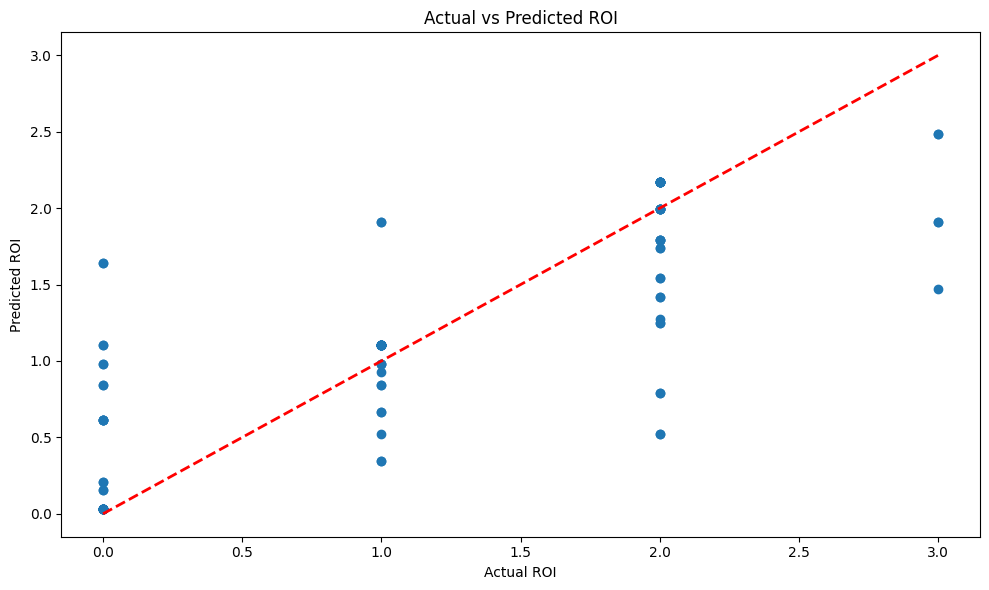

In [80]:
# Create a scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y, model.predict())
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual ROI")
plt.ylabel("Predicted ROI")
plt.title("Actual vs Predicted ROI")
plt.tight_layout()
plt.show()

In [81]:
# Convert categorical variables to numeric
le = LabelEncoder()
columns_to_encode = ['SalesGrowth', 'BrandAwareness', 'CustomerEngagement', 'MarketPenetration', 'ROI']
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

In [82]:
# Calculate the correlation matrix
correlation_matrix = df[columns_to_encode].corr()

In [83]:
# View the correlation matrix
print(correlation_matrix)

                    SalesGrowth  BrandAwareness  CustomerEngagement  \
SalesGrowth            1.000000        0.632222            0.715650   
BrandAwareness         0.632222        1.000000            0.639275   
CustomerEngagement     0.715650        0.639275            1.000000   
MarketPenetration      0.603536        0.644787            0.609923   
ROI                    0.578183        0.616396            0.740193   

                    MarketPenetration       ROI  
SalesGrowth                  0.603536  0.578183  
BrandAwareness               0.644787  0.616396  
CustomerEngagement           0.609923  0.740193  
MarketPenetration            1.000000  0.650663  
ROI                          0.650663  1.000000  


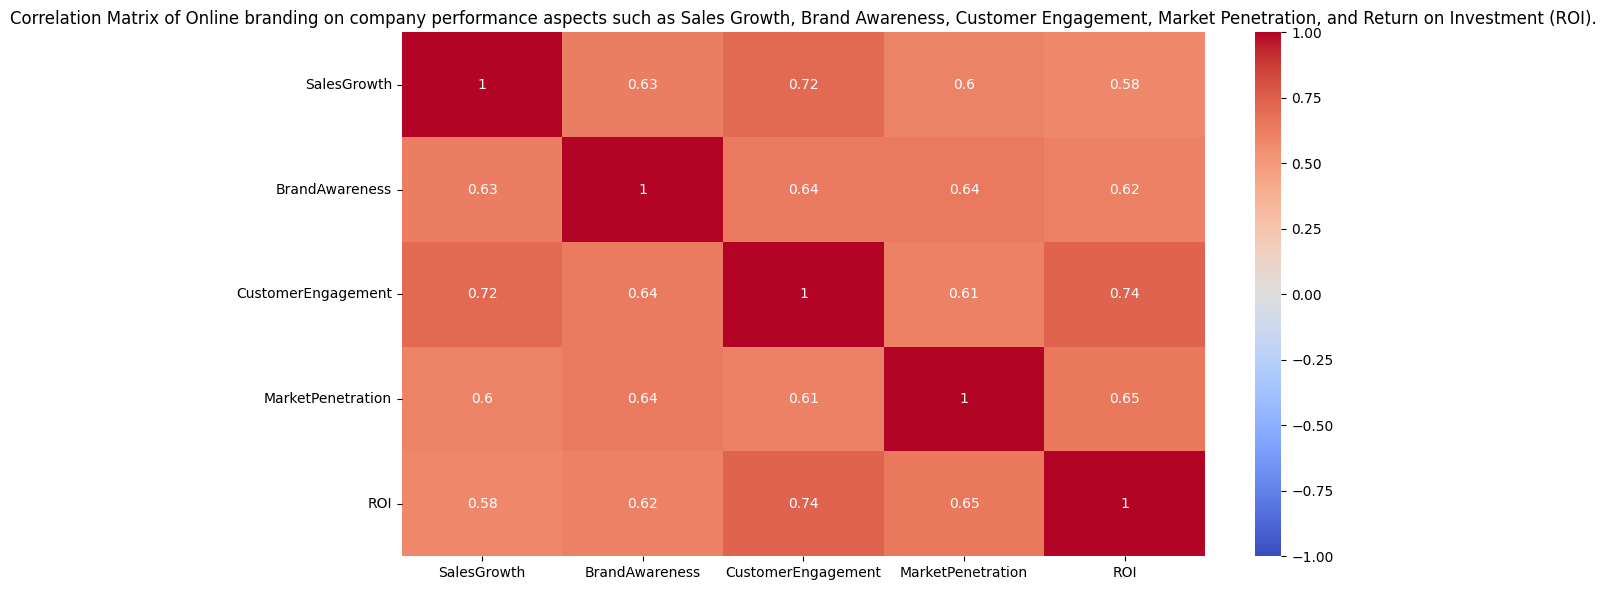

In [84]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Online branding on company performance aspects such as Sales Growth, Brand Awareness, Customer Engagement, Market Penetration, and Return on Investment (ROI).')
plt.tight_layout()
plt.show()

In [85]:
# Print the correlation coefficients with ROI
roi_correlations = correlation_matrix['ROI'].sort_values(ascending=False)
print("Correlations with ROI:")
print(roi_correlations)

Correlations with ROI:
ROI                   1.000000
CustomerEngagement    0.740193
MarketPenetration     0.650663
BrandAwareness        0.616396
SalesGrowth           0.578183
Name: ROI, dtype: float64


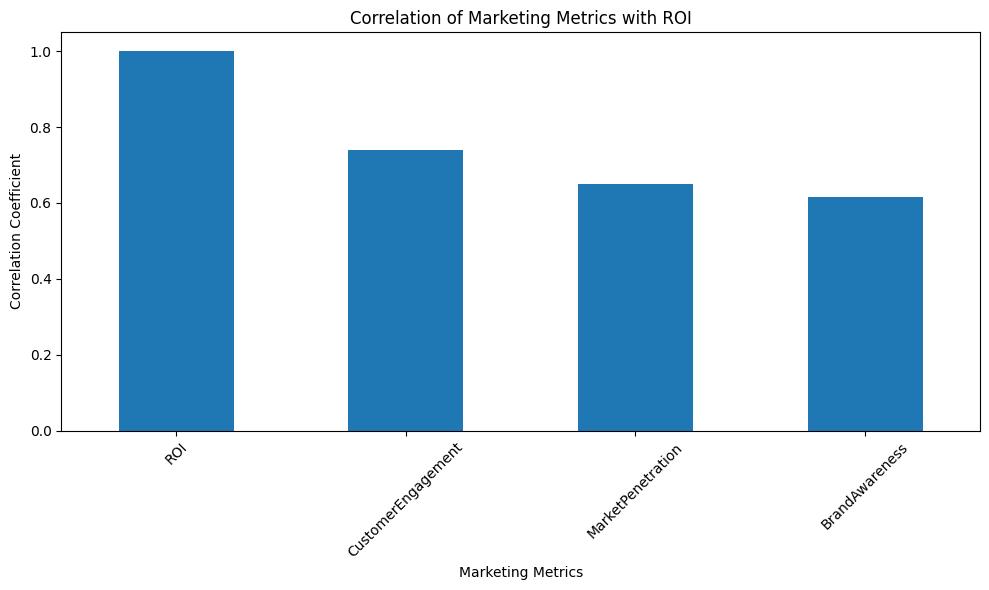

In [86]:
# Create a bar plot of correlations with ROI
plt.figure(figsize=(10, 6))
roi_correlations[:-1].plot(kind='bar')  # Exclude ROI's correlation with itself
plt.title('Correlation of Marketing Metrics with ROI')
plt.xlabel('Marketing Metrics')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

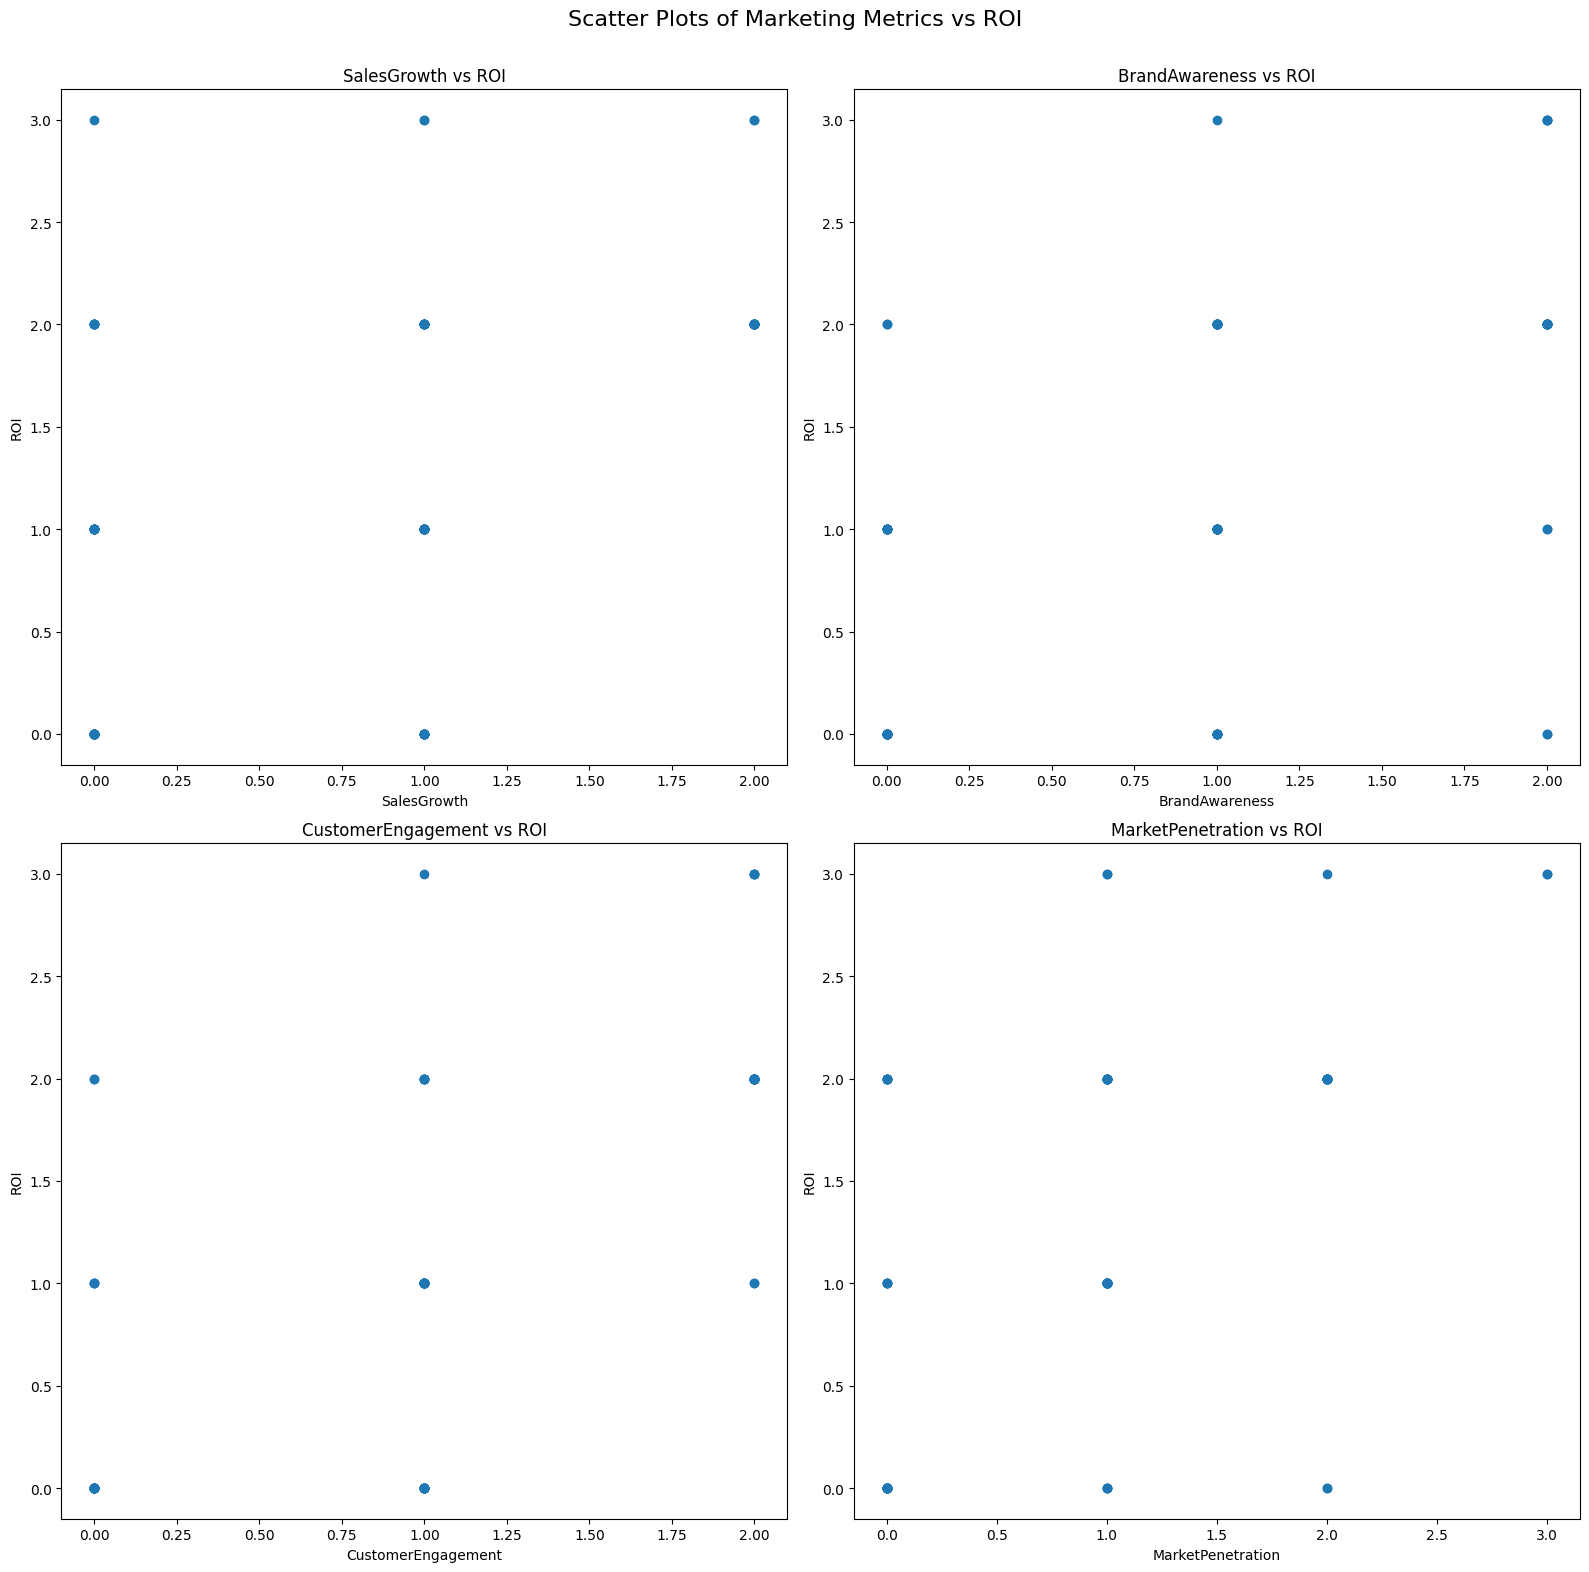

In [87]:
# Scatter plots of each variable against ROI
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
fig.suptitle('Scatter Plots of Marketing Metrics vs ROI', fontsize=16)

for i, column in enumerate(['SalesGrowth', 'BrandAwareness', 'CustomerEngagement', 'MarketPenetration']):
    ax = axes[i // 2, i % 2]
    ax.scatter(df[column], df['ROI'])
    ax.set_xlabel(column)
    ax.set_ylabel('ROI')
    ax.set_title(f'{column} vs ROI')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

In [88]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [89]:
# Perform one-way ANOVA for each independent variable
independent_vars = ['SalesGrowth', 'BrandAwareness', 'CustomerEngagement', 'MarketPenetration']
results = {}

for var in independent_vars:
    model = ols(f'ROI ~ C({var})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    results[var] = anova_table

In [90]:
# Print ANOVA results
for var, anova_result in results.items():
    print(f"\nANOVA Results for {var}:")
    print(anova_result)


ANOVA Results for SalesGrowth:
                   sum_sq    df          F        PR(>F)
C(SalesGrowth)  29.854159   2.0  26.256317  7.701073e-10
Residual        55.145841  97.0        NaN           NaN

ANOVA Results for BrandAwareness:
                      sum_sq    df          F        PR(>F)
C(BrandAwareness)  32.684547   2.0  30.300809  5.980486e-11
Residual           52.315453  97.0        NaN           NaN

ANOVA Results for CustomerEngagement:
                          sum_sq    df          F        PR(>F)
C(CustomerEngagement)  48.922209   2.0  65.766975  8.898544e-19
Residual               36.077791  97.0        NaN           NaN

ANOVA Results for MarketPenetration:
                        sum_sq    df          F        PR(>F)
C(MarketPenetration)  36.37249   3.0  23.935416  1.191683e-11
Residual              48.62751  96.0        NaN           NaN


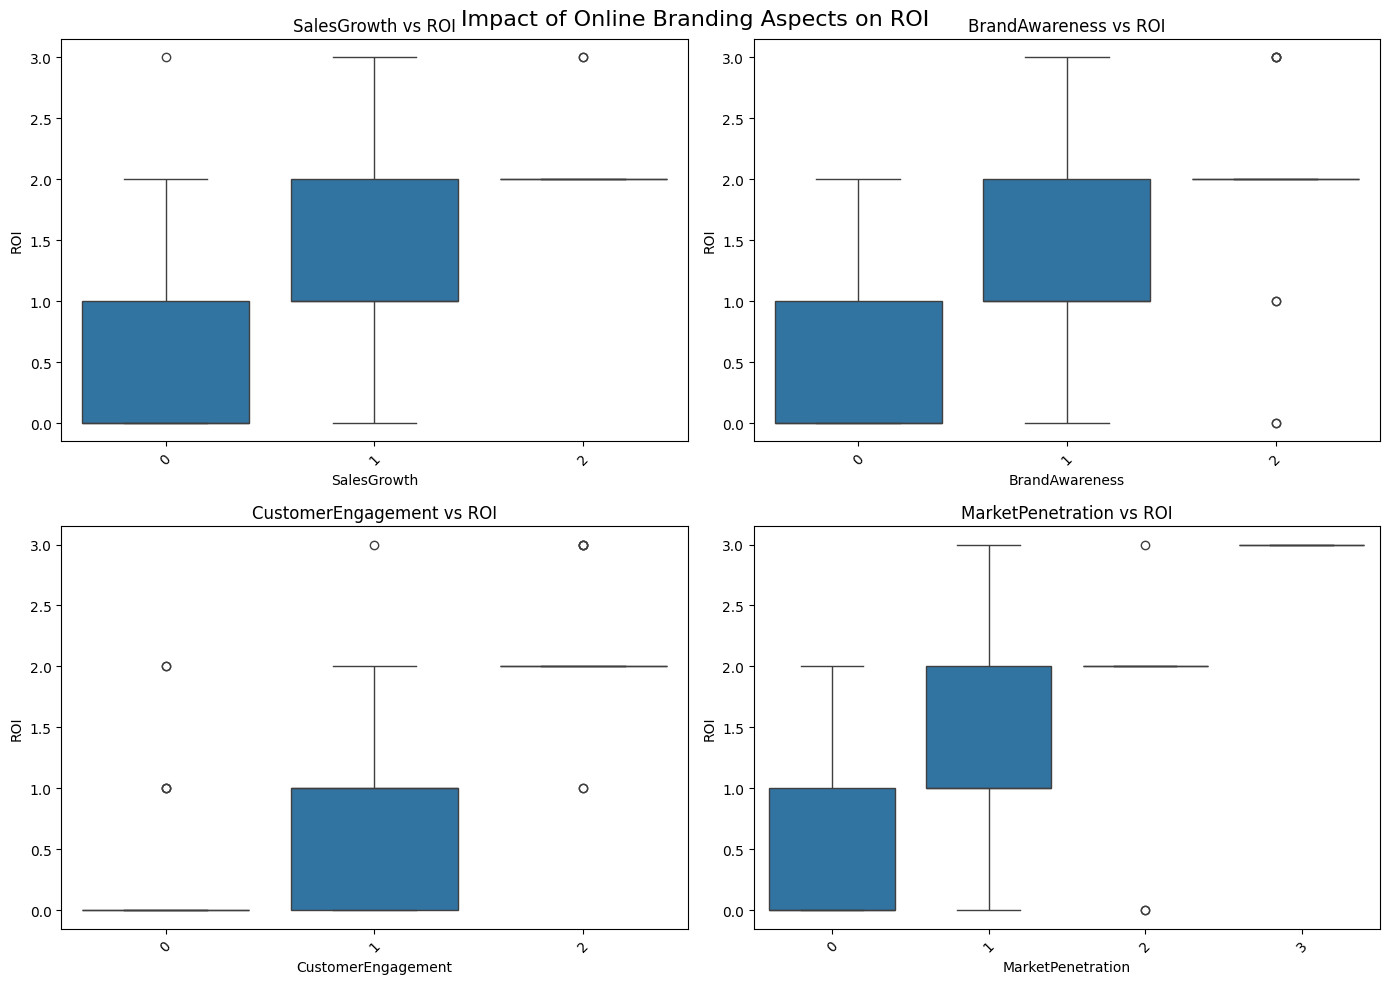

In [91]:
# Visualize the relationships
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Impact of Online Branding Aspects on ROI', fontsize=16)

for i, var in enumerate(independent_vars):
    ax = axes[i // 2, i % 2]
    sns.boxplot(x=var, y='ROI', data=df, ax=ax)
    ax.set_title(f'{var} vs ROI')
    ax.set_xlabel(var)
    ax.set_ylabel('ROI')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [93]:
# Calculate effect sizes (Eta-squared)
effect_sizes = {}
for var, anova_result in results.items():
    ss_between = anova_result.loc[f'C({var})', 'sum_sq']
    ss_total = ss_between + anova_result.loc['Residual', 'sum_sq']
    eta_squared = ss_between / ss_total
    effect_sizes[var] = eta_squared

In [95]:
# Print effect sizes
print("\nEffect Sizes (Eta-squared):")
for var, effect_size in effect_sizes.items():
    print(f"{var}: {effect_size:.4f}")


Effect Sizes (Eta-squared):
SalesGrowth: 0.3512
BrandAwareness: 0.3845
CustomerEngagement: 0.5756
MarketPenetration: 0.4279


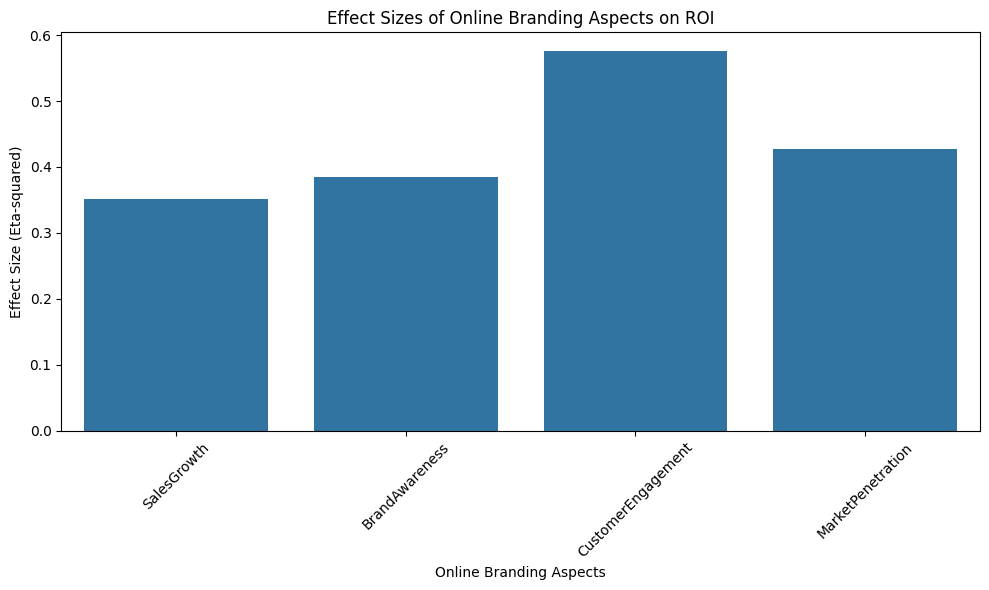

In [96]:
# Visualize effect sizes
plt.figure(figsize=(10, 6))
sns.barplot(x=list(effect_sizes.keys()), y=list(effect_sizes.values()))
plt.title('Effect Sizes of Online Branding Aspects on ROI')
plt.xlabel('Online Branding Aspects')
plt.ylabel('Effect Size (Eta-squared)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [97]:
from scipy import stats

In [98]:
# Perform one-way ANOVA for each independent variable
independent_vars = ['SalesGrowth', 'BrandAwareness', 'CustomerEngagement', 'MarketPenetration']
results = {}

for var in independent_vars:
    groups = [group for _, group in df.groupby(var)['ROI']]
    f_value, p_value = stats.f_oneway(*groups)
    results[var] = {'F-value': f_value, 'p-value': p_value}

In [99]:
# Print ANOVA results
for var, result in results.items():
    print(f"ANOVA results for {var}:")
    print(f"F-value: {result['F-value']:.4f}")
    print(f"p-value: {result['p-value']:.4f}")
    print()


ANOVA results for SalesGrowth:
F-value: 26.2563
p-value: 0.0000

ANOVA results for BrandAwareness:
F-value: 30.3008
p-value: 0.0000

ANOVA results for CustomerEngagement:
F-value: 65.7670
p-value: 0.0000

ANOVA results for MarketPenetration:
F-value: 23.9354
p-value: 0.0000



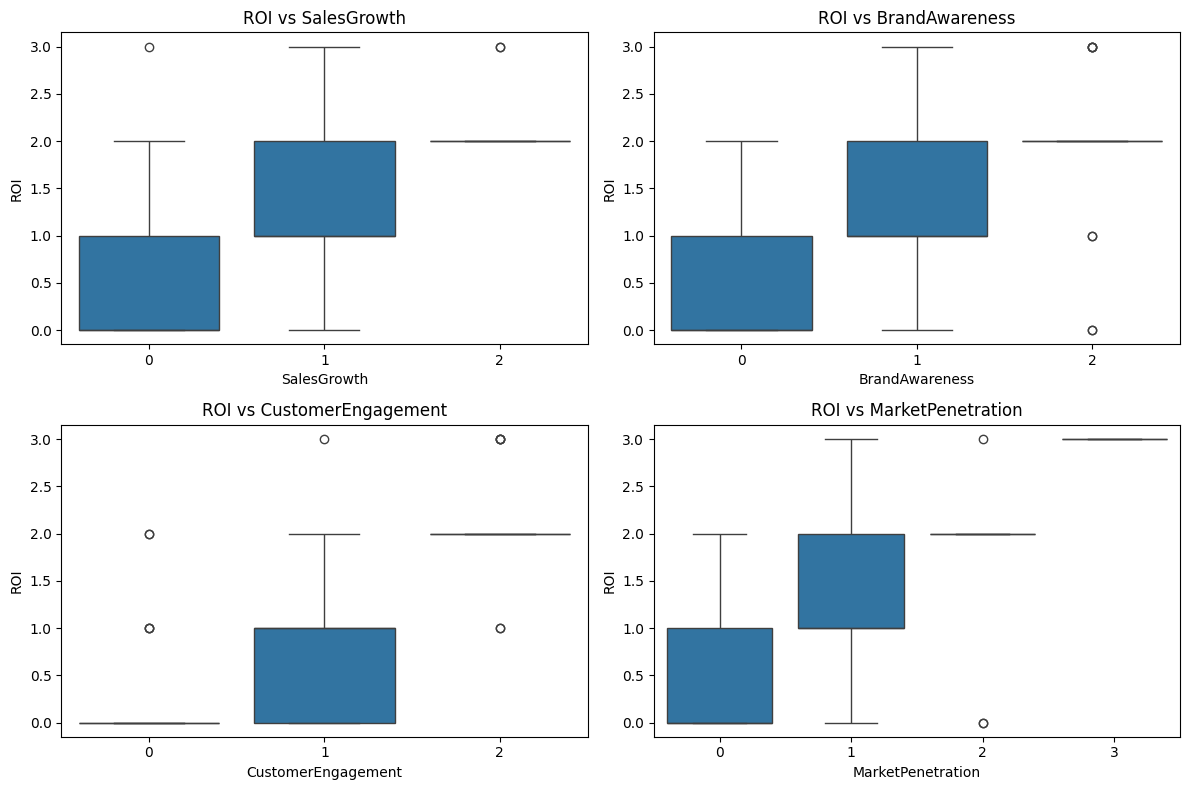

In [100]:
# Visualize results using box plots
plt.figure(figsize=(12, 8))
for i, var in enumerate(independent_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=var, y='ROI', data=df)
    plt.title(f'ROI vs {var}')
    plt.xlabel(var)
    plt.ylabel('ROI')

plt.tight_layout()
plt.show()